In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
# 、成人自闭症数据统计分析。（28分）
#  AdultAutism.csv是成人自闭症数据集，根据数据进行分析。目标列“class”

import pandas as pd
import numpy as py
a1=pd.read_csv('E:\\python代码\\yk\\yuekao\\AdultAutism.csv')
# 1、读取数据：AdultAutism.csv，并查看数据信息。(2分)
print("读取数据",a1)
print('查看数据信息\n',a1.info)
# 2、删除掉数据集中重复的数据。(2分)
a1.duplicated().any()
#删除重复值
a1=a1.drop_duplicates()
a1.duplicated().any()
print("删除掉数据集中重复的数据。后\n",a1)
# 3、将缺失的“age”字段的值，填充为该字段的众数。(3分)
print('题3')
a1=pd.DataFrame(a1).dropna()
a1['age'].isnull().any()




读取数据      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
707         1         0         1         1         1         0         1   
708         1         0         1         0         0         0         0   
709         1         0         0         0         0         0         1   
710         1         1         0         1         0         0         1   
711         1         0         0         0         0         0         1   

     A8_Score  A9_Score  A10_Score  ...  gender          ethnicity jau

False

In [75]:
# 4、将数据集拆分成7:3的训练集和测试集。(3分)
x=a1[["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","age"]]
y=a1['class']
y
y=py.where(y=='NO',1,0)
# y
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=7)

# 5、使用合适参数创建随机森林和xgboost模型。（3分)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_split=3)
clf.fit(X_train, y_train)
yc_1 = clf.predict(X_test)




from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)
# fit model
bst.fit(X_train, y_train)
# make predictions
yc_2 = bst.predict(X_test)

# 6、使用网格搜索对2个算法进行参数调优，至少包含2个超参数。(3分)

cs1={'max_depth':[3,4,5],'min_samples_split':[3,4,5]}
cs2={'learning_rate':[1,2,3],'max_depth':[2,3,4]}
sj_cv = GridSearchCV(clf, cs1)
bst_cv = GridSearchCV(bst, cs2)


# 7、训练并分别得到2个算法的最优模型。(3分)
sj_cv.fit(X_train, y_train)
t7_zy1=sj_cv.best_estimator_
print('最优模型1',t7_zy1)

bst_cv.fit(X_train, y_train)
t7_zy2=bst_cv.best_estimator_
print('最优模型2',t7_zy1)

# 8、使用准确率、精确率和召回率等至少2种指标对上面的模型进行评估。(3分)
t8_cy1=t7_zy1.predict(X_test)
print("1准确率",accuracy_score(y_test, t8_cy1))
print("1精确率",precision_score(y_test, t8_cy1))
print("1召回率",recall_score(y_test, t8_cy1))

print("-------------------模型分割线-------------------")
t8_cy2=t7_zy2.predict(X_test)
print("2准确率",accuracy_score(y_test, t8_cy2))
print("2精确率",precision_score(y_test, t8_cy2))
print("2召回率",recall_score(y_test, t8_cy2))


最优模型1 RandomForestClassifier(max_depth=5, min_samples_split=3)
最优模型2 RandomForestClassifier(max_depth=5, min_samples_split=3)
1准确率 0.9665071770334929
1精确率 0.9808917197452229
1召回率 0.9746835443037974
-------------------模型分割线-------------------
2准确率 0.9473684210526315
2精确率 0.9622641509433962
2召回率 0.9683544303797469


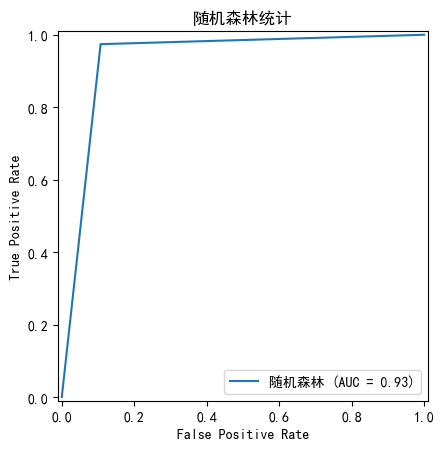

In [45]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False
# # 9、画出ROC曲线评估2个最优模型。(3分)

fpr, tpr, thresholds = roc_curve(y_test, t8_cy1)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='随机森林')
display.plot() 
plt.title("随机森林最优模型")
plt.show()

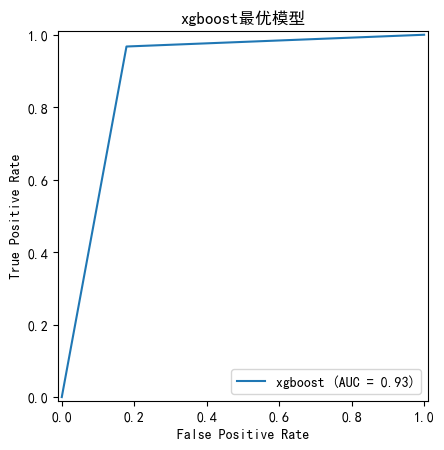

In [47]:
fpr1, tpr1, thresholds = roc_curve(y_test, t8_cy2)
roc_auc1 = auc(fpr, tpr)
display1 = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1,estimator_name='xgboost')
display1.plot() 
plt.title("xgboost最优模型")
plt.show()

In [53]:
# 10、分别输出2个最优模型的特征重要性及测试数据的预测结果。(3分)
t10_zy1=t7_zy1.feature_importances_
print("最优模型特征重要性\n",t10_zy1)


print('测试数据的预测结果。\n',t8_cy1)

print("-------------------------------------------------------------------------------")
t10_zy2=t7_zy2.feature_importances_
print("最优模型特征重要性\n",t10_zy2)
print('测试数据的预测结果。\n',t8_cy2)




最优模型特征重要性
 [0.05624606 0.02809898 0.05770842 0.10829969 0.16381783 0.12279708
 0.0824242  0.04708428 0.26103653 0.04001498 0.03247194]
测试数据的预测结果。
 [1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1]
-------------------------------------------------------------------------------
最优模型特征重要性
 [0.04807675 0.01035871 0.01830333 0.05471678 0.08136349 0.0573526
 0.03228644 0.03372563 0.6586427  0.00517359 0.        ]
测试数据的预测结果。
 [1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1